In [38]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 

In [39]:
(X_train,Y_train), (X_test,Y_test) = keras.datasets.mnist.load_data()
len(X_train), len(X_test)

(60000, 10000)

In [40]:
X_train[0].shape

(28, 28)

In [41]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

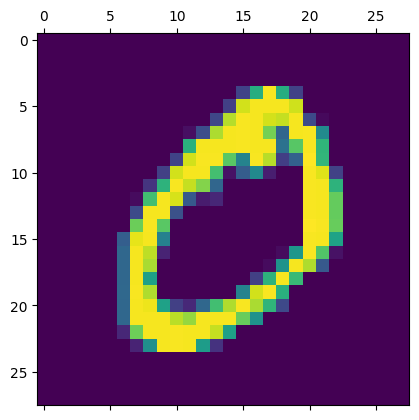

In [42]:
plt.matshow(X_train[1])

In [43]:
Y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [44]:
X_train = X_train / 255
X_test = X_test / 255

In [45]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [46]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,Y_train,epochs=5)

C:\Users\ARYAN BHAGAT\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8124 - loss: 0.7242
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9135 - loss: 0.3153
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9198 - loss: 0.2840
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9236 - loss: 0.2741
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9259 - loss: 0.2645


In [ ]:
model.evaluate(X_test_flattened,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9123 - loss: 0.3072


[0.27014222741127014, 0.9254000186920166]

In [48]:
y_pred = model.predict(X_test_flattened)
y_pred[0]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([2.8913289e-02, 7.2330391e-07, 7.4837849e-02, 9.5594525e-01,
       3.8860729e-03, 1.2831335e-01, 6.8859163e-07, 9.9982601e-01,
       1.2910435e-01, 6.5773737e-01], dtype=float32)

In [49]:
np.argmax(y_pred[0])

7

In [50]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [51]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [52]:
tf.math.confusion_matrix(labels=Y_test,predictions=y_pred_labels)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    5,    4,    2,    3,    0],
       [   0, 1116,    4,    1,    0,    1,    4,    2,    7,    0],
       [   4,    9,  934,   14,    9,    3,   12,   10,   35,    2],
       [   4,    1,   22,  915,    1,   22,    2,   10,   27,    6],
       [   1,    1,    8,    1,  927,    0,    8,    3,   11,   22],
       [  10,    3,    7,   34,   11,  761,   13,    7,   40,    6],
       [  11,    3,   10,    1,    8,   11,  908,    2,    4,    0],
       [   1,   10,   27,    5,    9,    0,    0,  948,    3,   25],
       [   5,    9,    8,   16,    9,   20,    8,   11,  883,    5],
       [  10,    7,    1,   10,   43,    6,    0,   21,   11,  900]])>

<AxesSubplot:>

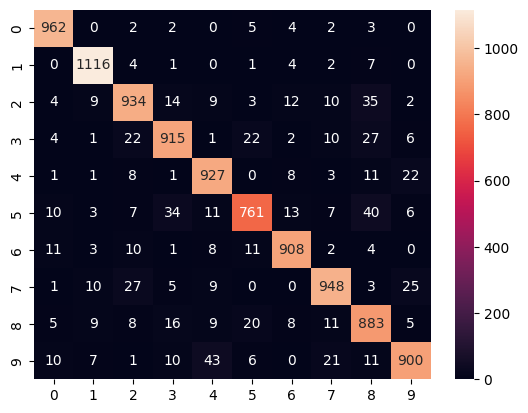

In [53]:
import seaborn as sns
sns.heatmap(tf.math.confusion_matrix(labels=Y_test,predictions=y_pred_labels),annot=True,fmt='d')

In [55]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,Y_train,epochs=5)

C:\Users\ARYAN BHAGAT\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.8676 - loss: 0.4635
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9614 - loss: 0.1336
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9733 - loss: 0.0894
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9808 - loss: 0.0617
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9845 - loss: 0.0515


In [59]:
model.evaluate(X_test_flattened,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9704 - loss: 0.0978


[0.08500281721353531, 0.9747999906539917]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


<AxesSubplot:>

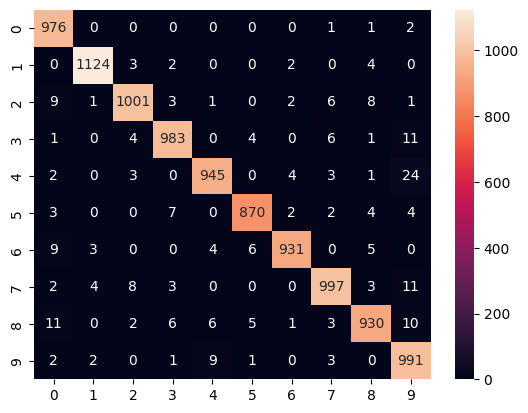

In [61]:
y_pred = model.predict(X_test_flattened)
y_pred_labels = [np.argmax(i) for i in y_pred]
tf.math.confusion_matrix(labels=Y_test,predictions=y_pred_labels)
sns.heatmap(tf.math.confusion_matrix(labels=Y_test,predictions=y_pred_labels),annot=True,fmt='d')

In [62]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=5)

C:\Users\ARYAN BHAGAT\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\ARYAN BHAGAT\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8707 - loss: 0.4502
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9624 - loss: 0.1279
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9753 - loss: 0.0849
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9806 - loss: 0.0637
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9866 - loss: 0.0458
